In [80]:
import pandas
import pickle
import itertools
import re
from pg import DB
db = DB()

In [102]:
p_values = db.query("SELECT p_value, tt_p_value FROM motifss where p_value NOTNULL").getresult()
shuffled_p_values = db.query("SELECT shuffled_p_value, tt_shuffled_p_value FROM motifss where shuffled_p_value NOTNULL").getresult()


p_values_df = pandas.DataFrame( p_values)
p_values_df.columns = ["real_p_values", "tt_real_p_values"]
p_values_df["shuffled_p_values" ] = pandas.DataFrame(shuffled_p_values)[0]
p_values_df["tt_shuffled_p_values" ] = pandas.DataFrame(shuffled_p_values)[1]


# shuffled_p_values

In [103]:
p_values_df.describe()

,real_p_values,tt_real_p_values,shuffled_p_values,tt_shuffled_p_values
count,27635.000000,27635.000000,27635.000000,27635.000000
mean,0.052957,0.735031,0.060082,0.996594
std,0.092183,0.402913,0.086971,0.020398
min,0.000000,0.000000,0.000000,0.152900
25%,0.005800,0.449700,0.007700,0.999900
50%,0.015800,1.000000,0.026900,1.000000
75%,0.054400,1.000000,0.075950,1.000000
max,0.954700,1.000000,0.893200,1.000000


In [83]:
db.query("SELECT count(*) FROM motifss where shuffled_p_value notNULL").getresult()

[(21318,)]

In [84]:
import numpy as np
thresholds = np.logspace(-1,2, num=100)/1000
thresholds

array([ 0.0001    ,  0.00010723,  0.00011498,  0.00012328,  0.00013219,
        0.00014175,  0.00015199,  0.00016298,  0.00017475,  0.00018738,
        0.00020092,  0.00021544,  0.00023101,  0.00024771,  0.00026561,
        0.0002848 ,  0.00030539,  0.00032745,  0.00035112,  0.00037649,
        0.0004037 ,  0.00043288,  0.00046416,  0.0004977 ,  0.00053367,
        0.00057224,  0.00061359,  0.00065793,  0.00070548,  0.00075646,
        0.00081113,  0.00086975,  0.0009326 ,  0.001     ,  0.00107227,
        0.00114976,  0.00123285,  0.00132194,  0.00141747,  0.00151991,
        0.00162975,  0.00174753,  0.00187382,  0.00200923,  0.00215443,
        0.00231013,  0.00247708,  0.00265609,  0.00284804,  0.00305386,
        0.00327455,  0.00351119,  0.00376494,  0.00403702,  0.00432876,
        0.00464159,  0.00497702,  0.0053367 ,  0.00572237,  0.00613591,
        0.00657933,  0.0070548 ,  0.00756463,  0.00811131,  0.00869749,
        0.00932603,  0.01      ,  0.01072267,  0.01149757,  0.01

In [85]:
smallest = 1/10000
fdrs = []
fdrs_d = {}
tt_fdrs_d={}
for threshold in thresholds:
    M = db.query("SELECT count(p_value) FROM motifss where p_value < '" + str(threshold) + "'").getresult()[0][0]
    tt_M = db.query("SELECT count(p_value) FROM motifss where tt_p_value < '" + str(threshold) + "'").getresult()[0][0]
    N = db.query("SELECT count(shuffled_p_value)FROM motifss where shuffled_p_value < '" + str(threshold) + "'").getresult()[0][0]
    tt_N = db.query("SELECT count(shuffled_p_value)FROM motifss where tt_shuffled_p_value < '" + str(threshold) + "'").getresult()[0][0]

    print(threshold, M, N)
    print(threshold, tt_M, tt_N)


    fdrs.append(N/M)
    fdrs_d[threshold] = (N+1)/(M+1)
    tt_fdrs_d[threshold] = (tt_N+1)/(tt_M+1)



0.0001 193 266
0.0001 5122 0
0.000107226722201 320 358
0.000107226722201 5122 0
0.00011497569954 320 358
0.00011497569954 5122 0
0.000123284673944 320 358
0.000123284673944 5122 0
0.000132194114847 320 358
0.000132194114847 5122 0
0.000141747416293 320 358
0.000141747416293 5122 0
0.000151991108295 320 358
0.000151991108295 5122 0
0.000162975083462 320 358
0.000162975083462 5122 0
0.000174752840001 320 358
0.000174752840001 5122 0
0.000187381742286 320 358
0.000187381742286 5122 0
0.000200923300257 462 478
0.000200923300257 5122 0
0.000215443469003 462 478
0.000215443469003 5122 0
0.000231012970008 462 478
0.000231012970008 5122 0
0.000247707635599 462 478
0.000247707635599 5122 0
0.000265608778295 462 478
0.000265608778295 5122 0
0.000284803586844 462 478
0.000284803586844 5122 0
0.000305385550883 574 570
0.000305385550883 5122 0
0.000327454916288 574 570
0.000327454916288 5122 0
0.000351119173422 574 570
0.000351119173422 5122 0
0.000376493580679 574 570
0.000376493580679 5122 0
0.00

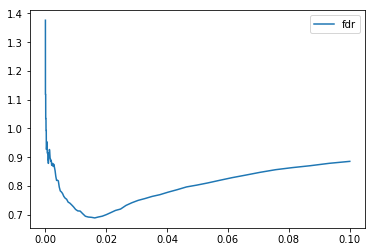

In [86]:
%matplotlib inline

import matplotlib
pandas.DataFrame({'fdr' :fdrs_d}).plot()

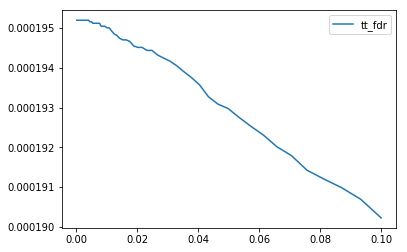

In [87]:
pandas.DataFrame({'tt_fdr' :tt_fdrs_d}).plot()